In [ ]:
import random
import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
df = datasets.load_iris()

In [ ]:
X = df['data']
print(X.shape)

(150, 4)


In [ ]:
df_Y = df['target']
print(df_Y.shape)

(150,)


In [ ]:
Y = pd.get_dummies(df_Y).values

In [ ]:
alpha = 1
epochs = list(range(1,201))

In [ ]:
v = np.random.normal(size=(4,2))
print(v)

[[ 1.20995004e-01 -7.46642776e-01]
 [ 4.98760262e-01  7.46934965e-04]
 [ 2.69917481e-01  8.42879504e-01]
 [-5.08379976e-01 -1.58269135e+00]]


In [ ]:
w = np.random.normal(size=(2,3))
print(w)

[[-1.21274029 -0.51749901  0.28513795]
 [ 0.04885816  1.28795171 -0.52271719]]


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3, random_state=50)

In [ ]:
def activation(x):
    y = 1 / (1 + np.exp(-x))
    return y

In [ ]:
def error(y, y_hat):
    err = np.array((y-y_hat)**2)
    err = err.mean()

    return err

In [ ]:
def accuracy(y, y_hat):
    acc = 0
    acc += np.argmax(y, axis=1) == np.argmax(y_hat, axis=1)
    # print(acc)
    return acc.mean()

In [ ]:
training_acc = []
training_err = []
v = np.random.normal(size=(4,2))
w = np.random.normal(size=(2,3))
best = [0, None, None]
last = 0
for _ in epochs:
    z_in = np.dot(X_train, v)

    z = []
    for zs in z_in:
        temp = []
        for i in zs:
            temp.append(activation(i))
        temp = np.array(temp)
        z.append(temp)

    z = np.array(z)

    y_in = np.dot(z, w)

    y_hat = []
    for ys in y_in:
        temp = []
        for y in ys:
            temp.append(activation(y))
        temp = np.array(temp)
        y_hat.append(temp)

    y_hat = np.array(y_hat)

    train_err = error(Y_train, y_hat)
    training_err.append(round(train_err, 7))

    train_acc = accuracy(Y_train, y_hat)
    training_acc.append(round(train_acc, 7))

    if (train_acc > best[0]):
        best = [train_acc, w, v]

    dy = (Y_train - y_hat) * y_hat * (1 - y_hat)
    dw = np.dot(z.transpose(), dy)
    w += alpha*dw

    dz = np.dot(dy,w.transpose()) * z * (1-z)
    dv = np.dot(X_train.transpose(), dz)
    v += alpha * dv

w = best[1]
v = best[2]

In [ ]:
training_acc[:5]

[0.3142857, 0.3428571, 0.3428571, 0.3428571, 0.3428571]

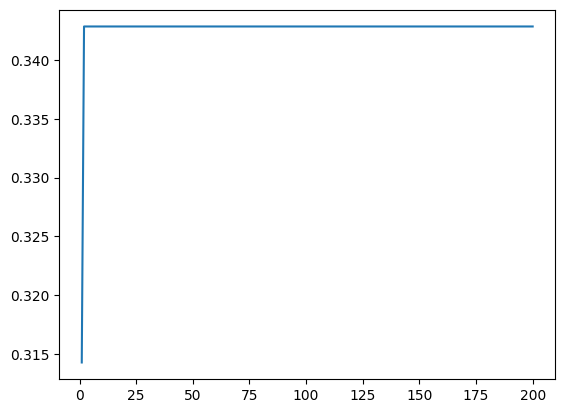

In [ ]:
plt.plot(epochs, training_acc)
plt.show()

In [ ]:
training_err[:5]

[0.2922609, 0.4222874, 0.2998905, 0.422901, 0.2968899]

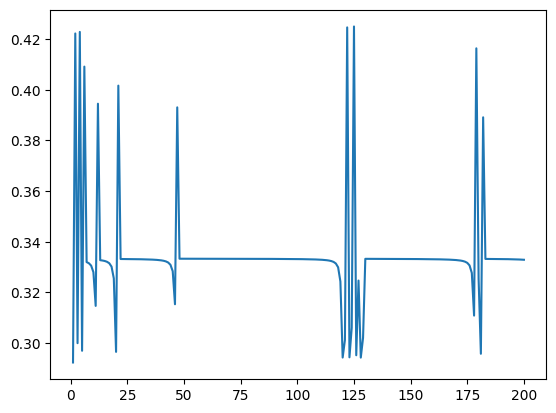

In [ ]:
me = training_err
plt.plot(epochs, me)
plt.show()

In [ ]:
z_in = np.dot(X_test, v)
print(z_in[:5])
print(z_in.shape)

[[ 39.81870438 149.39397023]
 [ 43.90915164 163.82915097]
 [ 34.65815521 121.4665344 ]
 [ 34.84666964 121.80024309]
 [ 46.46391732 175.18505982]]
(45, 2)


In [ ]:
z = []
for zs in z_in:
    temp = []
    for i in zs:
        temp.append(activation(i))
    temp = np.array(temp)
    z.append(temp)

z = np.array(z)
print(z[:5])
print(z.shape)

[[1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]]
(45, 2)


In [ ]:
y_in = np.dot(z, w)
print(y_in[:5])
print(y_in.shape)

[[-10.07645515 -14.81775106  -6.0291498 ]
 [-10.07645515 -14.81775106  -6.0291498 ]
 [-10.07645515 -14.81775106  -6.0291498 ]
 [-10.07645515 -14.81775106  -6.0291498 ]
 [-10.07645515 -14.81775106  -6.0291498 ]]
(45, 3)


In [ ]:
y_hat = []
for ys in y_in:
    temp = []
    for y in ys:
        temp.append(activation(y))
    temp = np.array(temp)
    y_hat.append(temp)

y_hat = np.array(y_hat)

print(y_hat[:5])
print(y_hat.shape)

[[4.20564748e-05 3.67055996e-07 2.40175766e-03]
 [4.20564748e-05 3.67055996e-07 2.40175766e-03]
 [4.20564748e-05 3.67055996e-07 2.40175766e-03]
 [4.20564748e-05 3.67055996e-07 2.40175766e-03]
 [4.20564748e-05 3.67055996e-07 2.40175766e-03]]
(45, 3)


In [ ]:
test_err = error(Y_test, y_hat)
print(test_err.mean())

0.332828299137653


In [ ]:
test_acc = accuracy(Y_test, y_hat)
accuracy_percentage = round(test_acc * 100, 2)
print(str(accuracy_percentage) + '%')


31.11%
